<h1>Bitcoin Price prediction</h1>
<ul>
    <li><a href="#1" style="text-decoration: none;">What is bitcoin?</a></li>
    <li><a href="#2" style="text-decoration: none;">Why we are working about?</a></li>
    <li><a href="#3" style="text-decoration: none;">What data we used?</a></li>
    <li>
        <ul>
            <li><a href="#4" style="text-decoration: none;">Load Python libray and Data</a></li>
            <li><a href="#5" style="text-decoration: none;">Preprocess</a></li>
            <li><a href="#6" style="text-decoration: none;">Prediction</a></li>
            <li><a href="#7" style="text-decoration: none;">Visualization</a></li>
        </ul>
    </li>
</ul>
<h3 id='1'>What is bitcoin?</h3>
<p>Bitcoin is a currency, which is a decentralized digital currency. There haven't any central bank or specific adminstration for this. The tranaction of bitcoin occure by user to user. The code of this currency are BTC and XBT</p>

<h3 id='2'>Why we are predicting?</h3>
<p>At present, Bitcoin is taking more attection to the people due to the price surge. It has consider as a finantial asset and even it is traded through many cryptocurrency exchanges like a stock market. Since it is up rising market, many investors are investing here, also hiring analyst to get useful petter for there company. Even also many researchers are working on it. As a data analyst I am also trying to predict Bitcoin price using propet model.</p>

<h3 id='3'>What data we used?</h3>
<p>Fot doing forcast, we have used <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance</a>. I have taken data from Jan 01, 2020 to Sep 16, 2021, which was daily basis frequency. To know more about download strategy <a href="https://www.macroption.com/yahoo-finance-download-historical-data/">Click Here</a></p>

<h3 id='4'>Load Python libray and Data</h3>
<p>After download the data. It time to load python libray.</p>

In [84]:
import pandas as pd
from prophet import Prophet

<p><b>Load Data</b></p>

In [85]:
df = pd.read_csv('BTC-USD.csv')

<h3 id='5'>Preprocess</h3>
<p>The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast. So I have to do some simple celan up to removing some type of unuseful columns</p>

In [86]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10


In [87]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [88]:
df = df[["Date", "Close"]]

In [89]:
df.columns = ["ds","y"]
df.columns

Index(['ds', 'y'], dtype='object')

In [90]:
df.head()

,ds,y
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383


In [91]:
df.shape

(624, 2)

<h3 id='6'>Prediction</h3>

In [92]:
fbPropt = Prophet(yearly_seasonality=True, daily_seasonality=True) #Define the model
fbPropt.fit(df)

<p>Now let's make a prediction of next 365 days uisng <b>make_future_dataframe()</b></p>

In [93]:
prediction_dataframe = fbPropt.make_future_dataframe(periods=365)
prediction_dataframe.head()

,ds
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05


In [94]:
prediction_dataframe.shape

(989, 1)

In [95]:
prediction = fbPropt.predict(prediction_dataframe)
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
984,2022-09-11,99978.435154,26999.296881,172502.670943
985,2022-09-12,100011.793115,26819.459684,173011.266805
986,2022-09-13,99992.777479,26744.364913,172864.505094
987,2022-09-14,100142.038293,25882.821636,173687.241777
988,2022-09-15,100120.979413,25084.470439,172715.071498


<h3 id='7'>Visualization</h3>

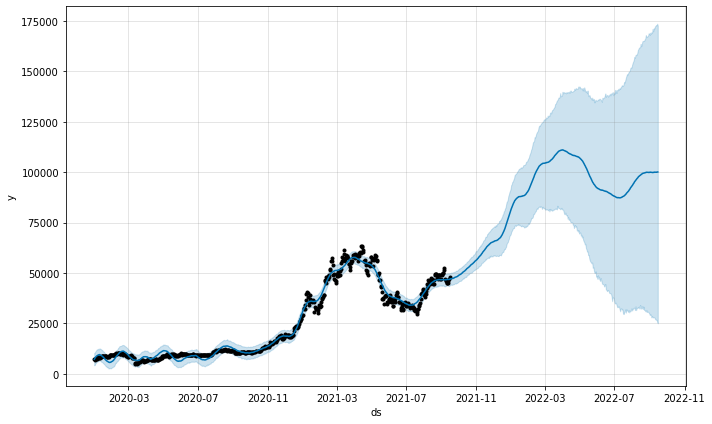

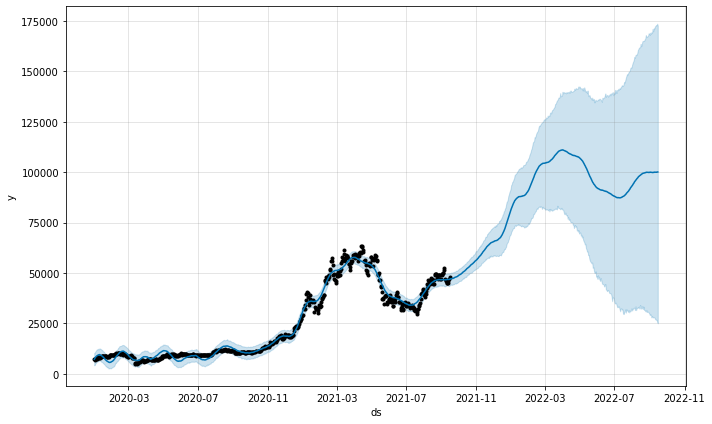

In [96]:
fbPropt.plot(prediction)

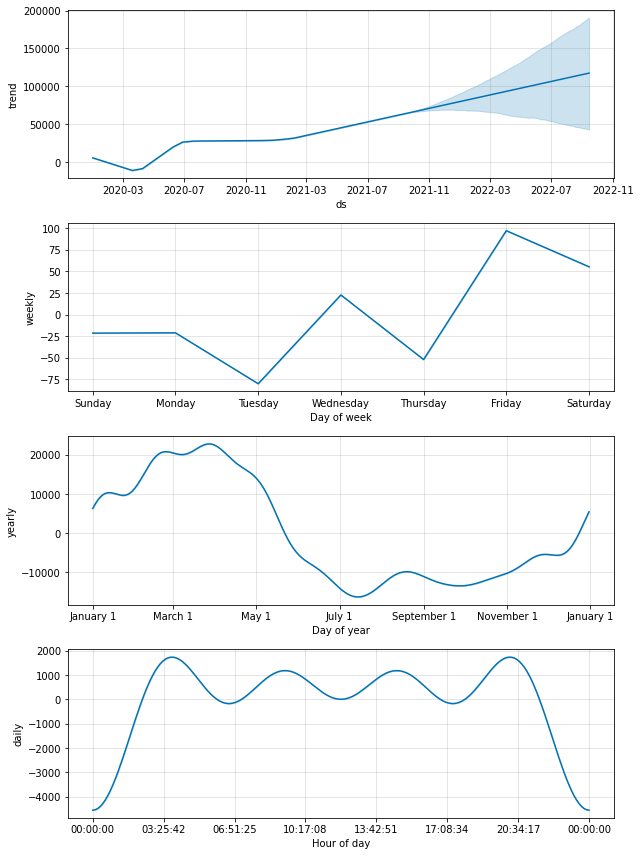

In [97]:
fig2 = fbPropt.plot_components(prediction)